## Llibreries utilitzades

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from dataloader_module import load_data, extreure_columnes
from metrics_module import metrics
from imblearn.over_sampling import SMOTE
from graphs_module import plot_roc_auc

D:\.anaconda\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\.anaconda\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Càrrega i pre-processament de les dades

In [2]:
# Càrrega i pre-processament de les dades
datafile = "data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)

# Dividir les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE per equilibrar les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Creació i test de naive_bayes

Accuracy: 0.7200
Precision: 0.1300
Recall: 0.7358
F1 Score: 0.2210


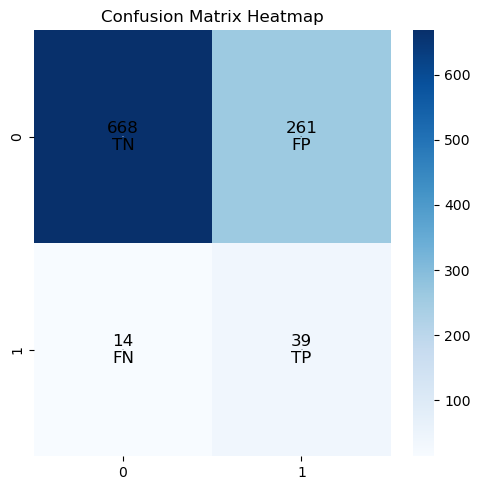

In [3]:
# Entrenar el model Naive Bayes
clf = GaussianNB()
clf.fit(X_train_resampled, y_train_resampled)

# Obtenir les probabilitats de predicció
y_proba = clf.predict_proba(X_test)[:, 1]

# Generar les prediccions amb el millor threshold
y_pred = (y_proba >= 0.99).astype(int)

# Guardar les prediccions en un fitxer .npy
np.save('predictions/predictions_naive_bayes.npy', y_pred)

# Avaluar el model
accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

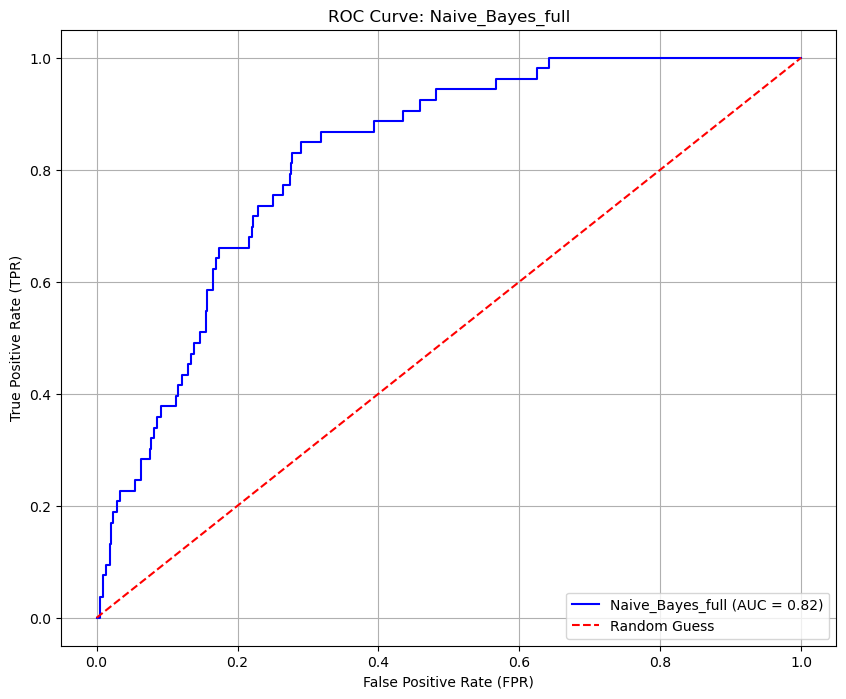

Naive_Bayes_full AUC Score: 0.82


In [4]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Naive_Bayes_full")

## Li treiem les tres característiques més importants segons el gràfic generat

Accuracy: 0.2393
Precision: 0.0652
Recall: 0.9811
F1 Score: 0.1222


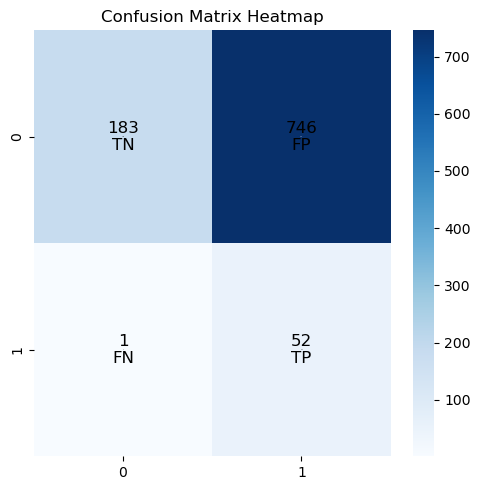

In [6]:
X,Y = load_data(datafile)
X,y = extreure_columnes(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)


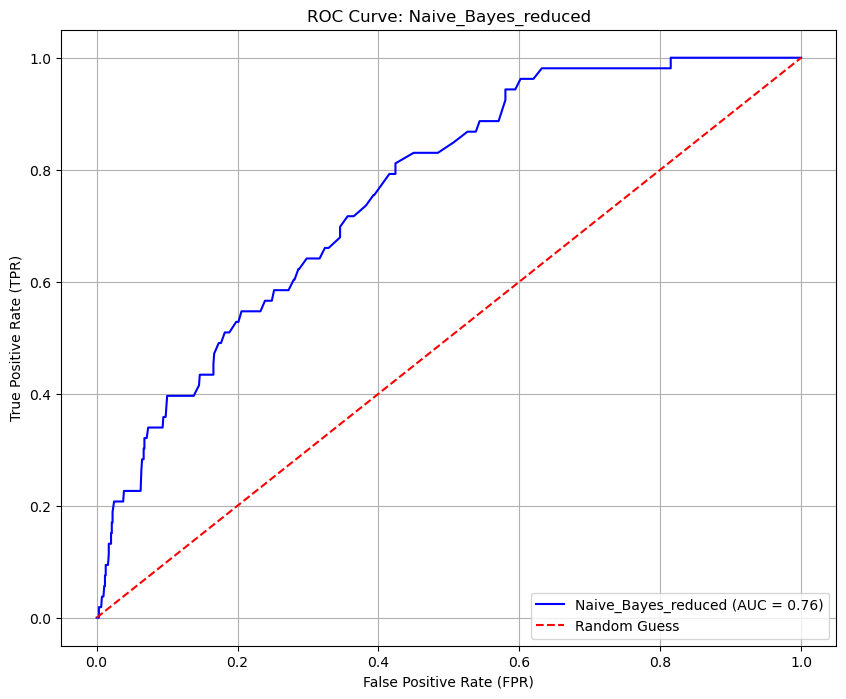

Naive_Bayes_reduced AUC Score: 0.76


In [7]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Naive_Bayes_reduced")